# Homework

In [73]:
#Handy imports from class

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal

df = pd.read_csv('temperature.csv')
df.head(4)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.83000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.83465,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.84779,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5


### 1. Write a function that efficiently converts every column to a different temperature scale

In [78]:
#converting temp from kelvin to Centigrade
import time
tic=time.perf_counter() 
def temp(t):
    c=t-273
    return c
temp_portland = df['Vancouver'].apply(temp)    
temp_portland
toc=time.perf_counter()
diff=toc-tic
print(diff)

#C = K - 273
  

0.02679359600006137


In [74]:
#not the efficient way, time consuming as it has to loop through all the columns and all the rows. 
tic=time.perf_counter()
def convertTemptoC(df):
    for column in df:
       # print(column)  #debugging
        if column != 'datetime':
            for i in range(len(df[column])):
                if df.loc[i, column] != 'NaN':
                    df.loc[i, column] =  df.loc[i, column] - 273.15
        
    pass
convertTemptoC(df)
toc=time.perf_counter()
difference = toc-tic
print(difference)

888.6027480569992


In [ ]:
def my_function(value):
    for column in df:
        if column=='month':
            if df["month"] == 12 or df["month"] == 1 or df["month"] == 2:
                winter_avg_temp = df["Vancouver"].mean()
                return winter_avg_temp
            elif df["month"] == 6 or df["month"] == 7 or df["month"] == 8:
                summer_avg_temp = df["Vancouver"].mean()
                return summer_avg_temp
            else:
                return None
                
    
my_function(df)
        

### 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.  

That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end

In [107]:
def missing_values(b):
    #padding is a type of interpolation that copies the value just before the missing entry. 
    #a=df.interpolate(method='pad', limit=2)
    #linear interpolation is the default interpolation, limit specifies the max number of NaN's it can fill. 
    a=b.interpolate(method='linear',limit_direction = 'forward', limit=2)
    return a

missing_values(df)


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Nahariyya,Jerusalem,Vanco_SMA,Vanco_SMA_3,Vanco_SMA_4,LA_SMA_3,LA_SMA_4,date,SD_SMA_3,SD_SMA_4
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-01,NaN,NaN
1,2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,...,31.25,30.35,NaN,NaN,NaN,NaN,NaN,2012-10-01,NaN,NaN
2,2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,...,31.25,30.35,NaN,NaN,NaN,NaN,NaN,2012-10-01,NaN,NaN
3,2012-10-01 15:00:00,11.476998,8.941866,16.310618,8.639833,18.712844,18.393355,20.242177,23.481487,12.083952,...,31.25,30.35,11.478680,11.478680,NaN,20.251773,NaN,2012-10-01,18.385619,NaN
4,2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,...,31.25,30.35,11.476998,11.476998,11.477748,20.242177,20.246633,2012-10-01,18.393355,18.390016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,8.850000,NaN,7.670000,20.400000,19.000000,16.390000,21.560000,12.570000,...,NaN,NaN,NaN,NaN,NaN,14.320000,13.192500,2017-11-29,17.756667,16.930000
45249,2017-11-29 21:00:00,NaN,9.740000,NaN,8.500000,22.530000,19.590000,17.460000,22.440000,13.300000,...,NaN,NaN,NaN,NaN,NaN,16.073333,15.105000,2017-11-29,18.790000,18.215000
45250,2017-11-29 22:00:00,NaN,10.240000,NaN,9.600000,22.810000,19.430000,18.190000,23.100000,13.290000,...,NaN,NaN,NaN,NaN,NaN,17.346667,16.602500,2017-11-29,19.340000,18.950000
45251,2017-11-29 23:00:00,NaN,9.870000,NaN,9.810000,22.500000,19.460000,19.000000,24.000000,12.990000,...,NaN,NaN,NaN,NaN,NaN,18.216667,17.760000,2017-11-29,19.493333,19.370000


### 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

In [49]:
#created month column in the dataframe
df['month']=pd.DatetimeIndex(df['datetime']).month
df['month']
df.head(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,309.10,NaN,NaN,NaN,10
1,2012-10-01 13:00:00,284.63,282.08,289.48,281.8,291.87,291.53,293.41,296.6,285.12,...,288.22,285.83,287.17,307.59,305.47,310.58,304.4,304.4,303.5,10


In [55]:
#divided months into bins and added labels
bins=[1,3,6,9,12]
season_labels = ['winter', 'spring', 'summer', 'Fall']
df['Seasons']=pd.cut(df['month'], bins, labels=season_labels)
grouped_season = df.groupby("Seasons")
season_average = {"lasvegas": grouped_season["Las Vegas"].mean(), 
                 "San Diego": grouped_season["San Diego"].mean()}

pd.DataFrame(season_average)

    

,lasvegas,San Diego
Seasons,,
winter,286.394675,287.374702
spring,297.196965,290.551596
summer,303.086515,295.002449
Fall,285.855432,288.722986


### 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual

In [96]:
#pandas built-in function rolling is used to calculate simple moving average. window size of 3 means calculates means for above 3 records, for column 7 i.e., Las Vegas.
df['LA_SMA_3'] = df.iloc[:, 7].rolling(window=3).mean()
#simple moving average with window size of 4
df['LA_SMA_4'] = df.iloc[:, 7].rolling(window=4).mean()

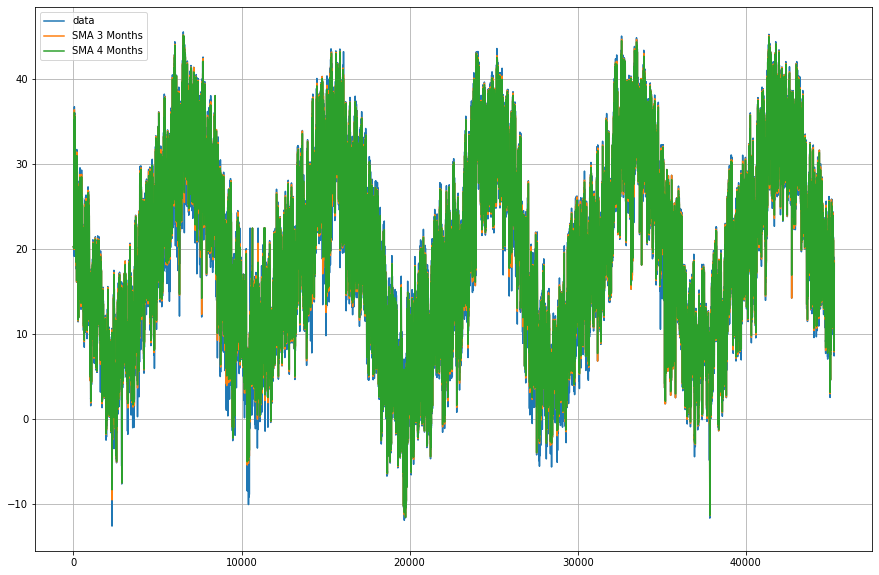

In [97]:
import matplotlib.pyplot as plt
#displays plot within jupyter notebook
%matplotlib inline
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['Las Vegas'],label='data')
plt.plot(df['LA_SMA_3'],label='SMA 3 Months')
plt.plot(df['LA_SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

In [98]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date']=df['datetime'].dt.date

In [99]:
px.line(df.groupby('date').agg({'Las Vegas':'mean'}).reset_index(), x='date', y='Las Vegas')

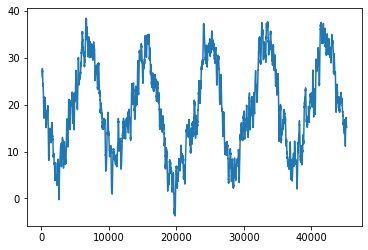

In [100]:
plt.plot(df['Las Vegas'].rolling(100).mean())

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           45253 non-null  datetime64[ns]
 1   Vancouver          44458 non-null  float64       
 2   Portland           45252 non-null  float64       
 3   San Francisco      44460 non-null  float64       
 4   Seattle            45250 non-null  float64       
 5   Los Angeles        45250 non-null  float64       
 6   San Diego          45252 non-null  float64       
 7   Las Vegas          45252 non-null  float64       
 8   Phoenix            45250 non-null  float64       
 9   Albuquerque        45252 non-null  float64       
 10  Denver             45252 non-null  float64       
 11  San Antonio        45252 non-null  float64       
 12  Dallas             45249 non-null  float64       
 13  Houston            45250 non-null  float64       
 14  Kansas

In [102]:
df.loc[df['Las Vegas'].isnull()]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Eilat,Haifa,Nahariyya,Jerusalem,Vanco_SMA,Vanco_SMA_3,Vanco_SMA_4,LA_SMA_3,LA_SMA_4,date
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-01


In [103]:
#pandas built-in function rolling is used to calculate simple moving average. window size of 3 means calculates means for above 3 records, for column 6 i.e., San Diego.
df['SD_SMA_3'] = df.iloc[:, 6].rolling(window=3).mean()
#simple moving average with window size of 4
df['SD_SMA_4'] = df.iloc[:, 6].rolling(window=4).mean()

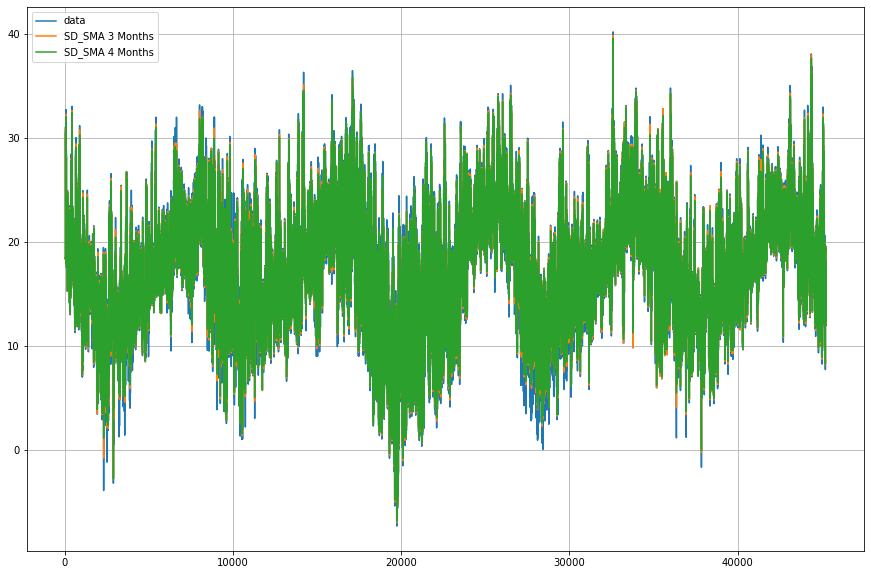

In [104]:
import matplotlib.pyplot as plt
#displays plot within jupyter notebook
%matplotlib inline
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['San Diego'],label='data')
plt.plot(df['SD_SMA_3'],label='SD_SMA 3 Months')
plt.plot(df['SD_SMA_4'],label='SD_SMA 4 Months')
plt.legend(loc=2)

In [105]:
px.line(df.groupby('date').agg({'San Diego':'mean'}).reset_index(), x='date', y='San Diego')


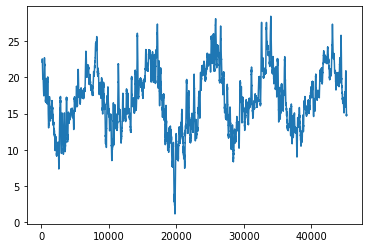

In [106]:
plt.plot(df['San Diego'].rolling(100).mean())